In [ ]:
# Data description
# avganncount: Average number of cancer cases diagnosed annually.
# avgdeathsperyear: Average number of deaths due to cancer per year.
# target_deathrate: Target death rate due to cancer.
# incidencerate: Incidence rate of cancer.
# medincome: Median income in the region.
# popest2015: Estimated population in 2015.
# povertypercent: Percentage of population below the poverty line.
# studypercap: Per capita number of cancer-related clinical trials conducted.
# binnedinc: Binned median income.
# medianage: Median age in the region.
# pctprivatecoveragealone: Percentage of population covered by private health insurance alone.
# pctempprivcoverage: Percentage of population covered by employee-provided private health insurance.
# pctpubliccoverage: Percentage of population covered by public health insurance.
# pctpubliccoveragealone: Percentage of population covered by public health insurance only.
# pctwhite: Percentage of White population.
# pctblack: Percentage of Black population.
# pctasian: Percentage of Asian population.
# pctotherrace: Percentage of population belonging to other races.
# pctmarriedhouseholds: Percentage of married households.
# birthrate: Birth rate in the region.

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
data_hh = pd.read_csv('avg-household-size.csv')
data_c = pd.read_csv('cancer_reg.csv')

In [61]:
data_hh.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [62]:
data_c.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


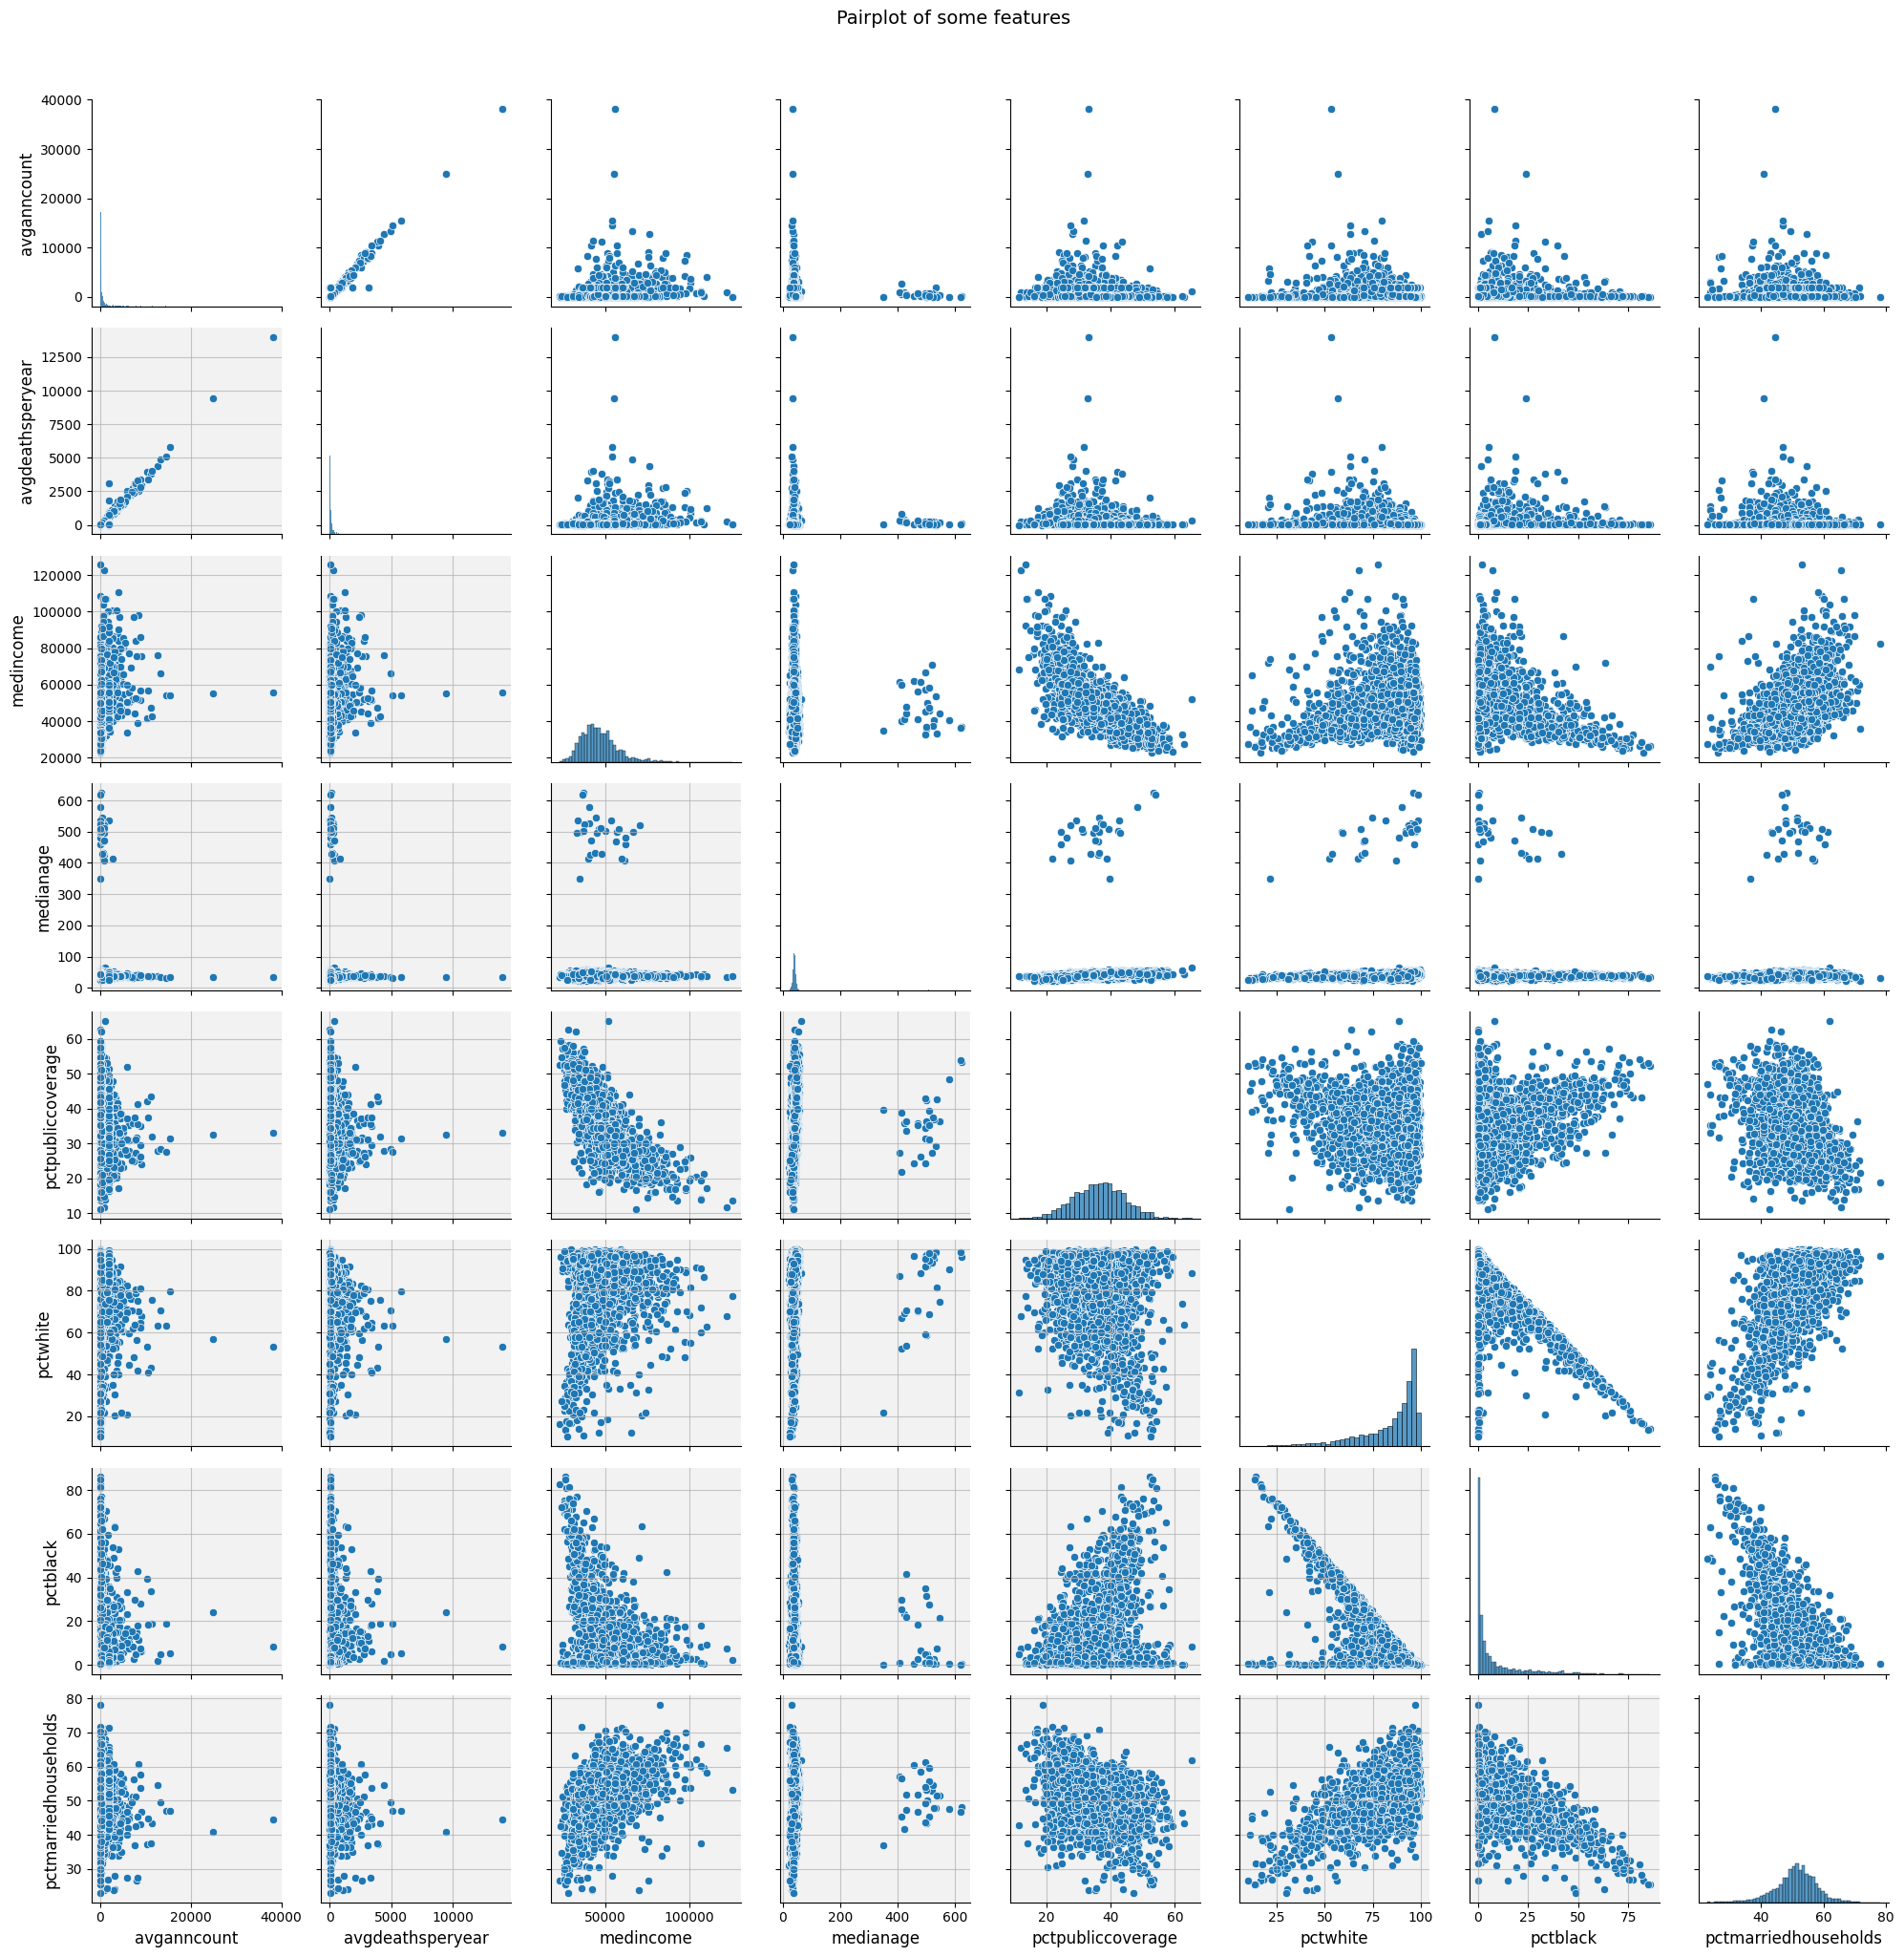

In [63]:
# Vizualisation of selected features of cancer file

features = ['avganncount','avgdeathsperyear','medincome','medianage','pctpubliccoverage','pctwhite','pctblack','pctmarriedhouseholds']
pairplot = sns.pairplot(data_c[features])
pairplot.fig.suptitle('Pairplot of some features', y=1.02, fontsize=14)
plt.tight_layout()
for i,j in zip(*np.tril_indices_from(pairplot.axes,-1)):
    pairplot.axes[i,j].set_facecolor((0.95,0.95,0.95))
    pairplot.axes[i,j].grid(True,linestyle='-',alpha=0.7)
    pairplot.axes[i,j].tick_params(axis='both',which='major',labelsize=10)

for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(),fontsize=12)
    ax.set_ylabel(ax.get_ylabel(),fontsize=12)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px

In [65]:
data_c.shape

(3047, 33)

In [66]:
data_c=data_c.drop('geography',axis=1)

In [67]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  percentmarried           3047 non-null   float64
 13  pctnohs18_24             3047 non-null   float64
 14  pcths18_24              

In [68]:
data_c.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [69]:
data_c.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrat

In [70]:
# checking duplicate data
data_c.duplicated().sum()

0

In [71]:
from sklearn.linear_model import LinearRegression

In [26]:
# X=data_c.iloc[:,:1].values
# y=data_c.iloc[:,5:6].values

In [72]:
data_c.columns


Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'percentmarried',
       'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctemployed16_over',
       'pctunemployed16_over', 'pctprivatecoverage', 'pctprivatecoveragealone',
       'pctempprivcoverage', 'pctpubliccoverage', 'pctpubliccoveragealone',
       'pctwhite', 'pctblack', 'pctasian', 'pctotherrace',
       'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [85]:
X=['inncidencerate','medincome','povertypercent','medianage','pctemployed16_over','pctwhite','pctmarriedhouseholds']
y=['avganncount']

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

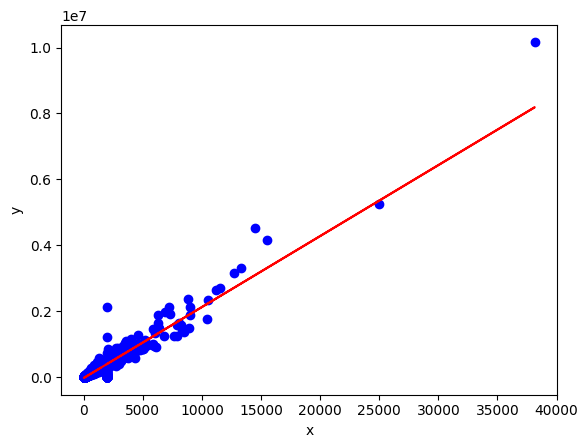

In [28]:
plt.scatter(X,y,color = 'b')
plt.plot(X,y_pred, color = 'r')
plt.ylabel('y')
plt.xlabel('x')
plt.show()